# Title: Heart Disease Project
`Author`: Asjad Mazahir

## About the dataset
### Context
This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

### Content
#### Column Descriptions:
* id (Unique id for each patient)
* age (Age of the patient in years)
* origin (place of study)
* sex (Male/Female)
* cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
* trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* chol (serum cholesterol in mg/dl)
* fbs (if fasting blood sugar > 120 mg/dl)
* restecg (resting electrocardiographic results)
* -- Values: [normal, stt abnormality, lv hypertrophy]
* thalach: maximum heart rate achieved
* exang: exercise-induced angina (True/ False)
* oldpeak: ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
* ca: number of major vessels (0-3) colored by fluoroscopy
* thal: [normal; fixed defect; reversible defect]
* num: the predicted attribute
### Acknowledgements
#### Creators:
* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.
#### Relevant Papers:
* Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.
* David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database."
* Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61.
#### Citation Request:
The authors of the databases have requested that any publications resulting from the use of the data include the names of the principal investigator responsible for the data collection at each institution. They would be:

* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D##

## Aims and Objective
Will be given after EDA

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Exploratory Data Analysis (EDA)

In [3]:
# load the dataset
df = pd.read_csv('heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [5]:
# checking the data shape
df.shape

(920, 16)

In [6]:
df['age'].describe()

count    920.000000
mean      53.510870
std        9.424685
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

The minimum age for heartdisease is 28 years

<Axes: xlabel='age', ylabel='Count'>

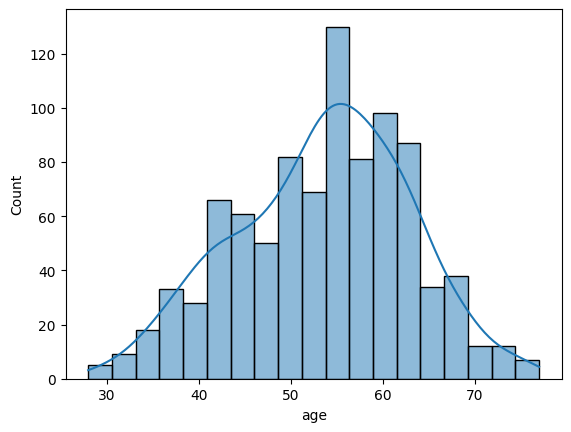

In [7]:
sns.histplot(df, x='age', kde=True)

Mean:  53.51086956521739
Median:  54.0
Mode:  54


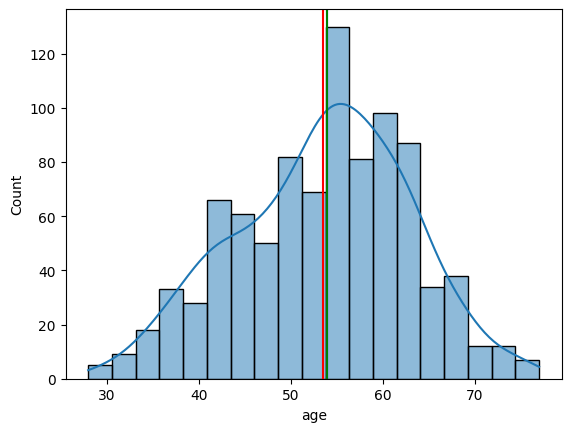

In [8]:
# plot the mean median mode of age column using sns
sns.histplot(df['age'], kde=True)
plt.axvline(df['age'].mean(), color='red')
plt.axvline(df['age'].median(), color='blue')
plt.axvline(df['age'].mode()[0], color='green')

# print the value of mean, median, mode
print("Mean: ", df['age'].mean())
print("Median: ", df['age'].median())
print("Mode: ", df['age'].mode()[0])

In [9]:
# plot the histogram of age column using plotly grouped by sex
fig = px.histogram(df, x="age", color="sex", barmode="group")
fig.show()

In [10]:
# find the value count of age column grouped by sex
df.groupby('sex')['age'].value_counts()

sex     age
Female  54     15
        51     11
        62     10
        43      9
        48      9
               ..
Male    77      2
        28      1
        31      1
        33      1
        76      1
Name: count, Length: 91, dtype: int64

In [11]:
# find the values os sex column
df['sex'].value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

In [12]:
# lets explore the dataset column
df['dataset'].value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

<Axes: xlabel='dataset', ylabel='count'>

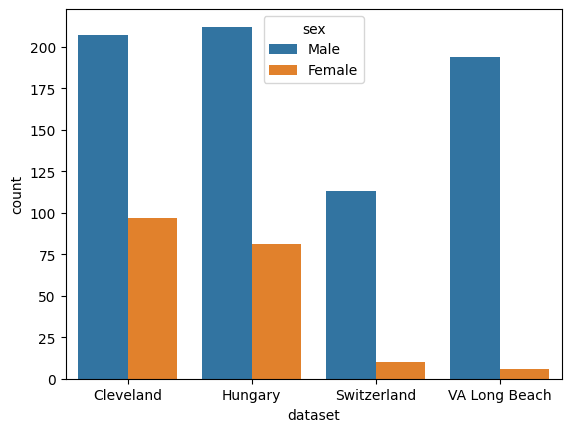

In [13]:
# plot the count plot to look the male-female distribution
sns.countplot(x='dataset', data=df, hue='sex')

In [14]:
# print the count of dataset column grouped by sex
print(df.groupby('sex')['dataset'].value_counts())

sex     dataset      
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Hungary          212
        Cleveland        207
        VA Long Beach    194
        Switzerland      113
Name: count, dtype: int64


In [15]:
# make a plotly plot of age column grouped by dataset column
fig = px.histogram(df, x='age', color='dataset')
fig.show()

# print the mean, median and mode of age column grouped by dataset column
print("Mean of the dataset", df.groupby('dataset')['age'].mean())
print("Median of the dataset", df.groupby('dataset')['age'].median())
print("Mode of the dataset", df.groupby('dataset')['age'].agg(pd.Series.mode))

Mean of the dataset dataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.350000
Name: age, dtype: float64
Median of the dataset dataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64
Mode of the dataset dataset
Cleveland              58
Hungary                54
Switzerland            61
VA Long Beach    [62, 63]
Name: age, dtype: object


In [16]:
# lets explore the cp (chest pain) column
print(df['cp'].value_counts())

# draw thw plot of age column grouped by cp column using plotly
fig = px.histogram(df, x='age', color='cp')
fig.show()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64


<Axes: xlabel='sex', ylabel='count'>

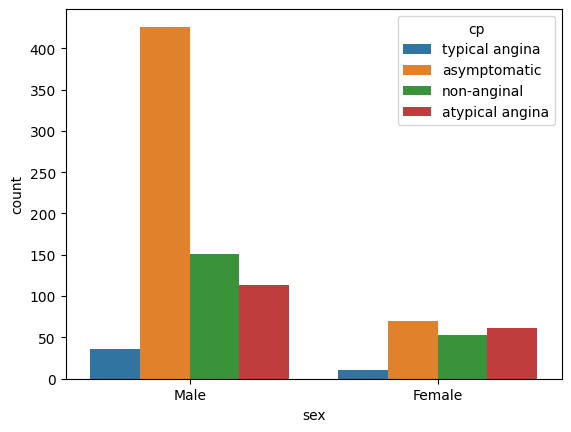

In [17]:
# count plot of cp column grouped by sex column
sns.countplot(x='sex', hue='cp', data=df)

<Axes: xlabel='dataset', ylabel='count'>

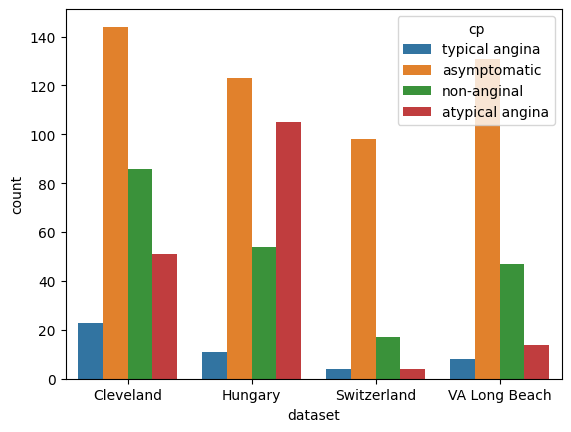

In [18]:
# count plot of cp column grouped by dataset column
sns.countplot(x='dataset', hue='cp', data=df)

In [19]:
# draw the plot of age column grouped by cp column using plotly
fig = px.histogram(df, x='age', color='cp')
fig.show()

count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64


<Axes: xlabel='trestbps', ylabel='Count'>

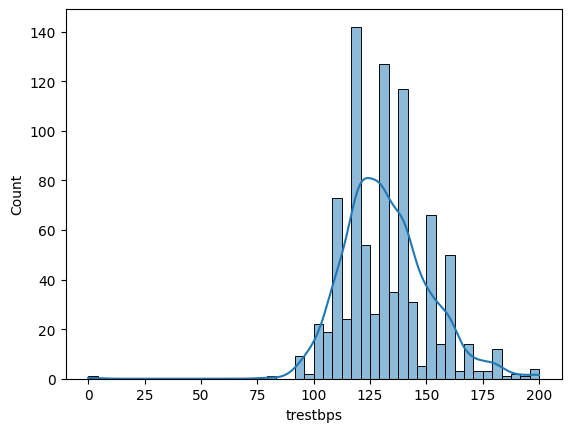

In [20]:
# lets explore trestbps (resting blood pressure) column
print(df['trestbps'].describe())

# create a hist plot of trestbp column
sns.histplot(df, x='trestbps',kde=True )

In [21]:
# Dealing with missing values in trestbps column
# percentage of missing values in trestbps column
print(f"Percentage of missing values in trestbps column:{df['trestbps'].isnull().sum()/len(df) * 100:.2f}%")

Percentage of missing values in trestbps column:6.41%


In [22]:
# impute the missing values in trestbps column using iterative imputer
from sklearn.impute import IterativeImputer
# create an instance of iterative imputer
imputer_1 = IterativeImputer(max_iter=10, random_state=0)
# fit the imputer to the data and transform it
df['trestbps'] = imputer_1.fit_transform(df[['trestbps']])
# checking for missing values
print(df['trestbps'].isnull().sum())

0


In [23]:
# lets impute other columns with missing values
# checking for the missing values
print((df.isnull().sum()/len(df) * 100).sort_values(ascending=False))

ca          66.413043
thal        52.826087
slope       33.586957
fbs          9.782609
oldpeak      6.739130
thalch       5.978261
exang        5.978261
chol         3.260870
restecg      0.217391
id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
trestbps     0.000000
num          0.000000
dtype: float64


In [24]:
print(df.info())
# separating object and numerical columns
print("The numerical columns are", df.select_dtypes(['float64', 'int64']).columns)
print("The object columns are", df.select_dtypes(['object']).columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
None
The numerical columns are Index(['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num'], dtype='object')
The obj

In [25]:
# chol, thalch, oldpeak, ca have missing values
# we will replace missing values with iterative imputer
imputer_2 = IterativeImputer(max_iter=10, random_state=23)
df[['chol', 'thalch', 'oldpeak', 'ca']] = imputer_2.fit_transform(df[['chol', 'thalch', 'oldpeak', 'ca']])

In [26]:
print((df.isnull().sum()/len(df) * 100).sort_values(ascending=False))

thal        52.826087
slope       33.586957
fbs          9.782609
exang        5.978261
restecg      0.217391
id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
trestbps     0.000000
chol         0.000000
thalch       0.000000
oldpeak      0.000000
ca           0.000000
num          0.000000
dtype: float64


- Now we have to impute thal, slope, fbs, exang, and restecg columns
- We will use the random forest classifier for imputation
- We will have to use label encoder first for using RandomForestClassifier
- We will define a function `encode_categorical_data(df, categorical_features)` for encoding the data.
- We will define a function `inverse_transform_categorical_data` for decoding the data.
- We will define a function `impute_categorical_missing_values_rf` for imputing the missing categorical data using random forest classifier.

In [27]:
# Defining a function for encoding the categorical dataframe
def encode_categorical_data(df, categorical_features):
    """
    Encode categorical data using LabelEncoder for a dataframe having multiple features.

    Parameters:
    df (pandas DataFrame): Input dataframe
    categorical_features (list): List of categorical feature names

    Returns:
    encoded_df (pandas DataFrame): Encoded dataframe
    le_dict (dict): Dictionary of LabelEncoders for each categorical feature
    """
    le_dict = {}
    encoded_df = df.copy()
    for feature in categorical_features:
        le = LabelEncoder()
        encoded_df[feature] = le.fit_transform(encoded_df[feature])
        le_dict[feature] = le
    return encoded_df, le_dict

# Defining a function for decoding the enoded dataframe
def inverse_transform_categorical_data(encoded_df, le_dict, categorical_features):
    """
    Inverse transform the encoded categorical data using the stored LabelEncoders.

    Parameters:
    encoded_df (pandas DataFrame): Encoded dataframe
    le_dict (dict): Dictionary of LabelEncoders for each categorical feature
    categorical_features (list): List of categorical feature names

    Returns:
    original_df (pandas DataFrame): Original dataframe with categorical data
    """
    original_df = encoded_df.copy()
    for feature in categorical_features:
        le = le_dict[feature]
        original_df[feature] = le.inverse_transform(original_df[feature])
    return original_df

In [28]:
# Defining a function for imputing categorical data using Random Forest Classifier
def impute_categorical_missing_values_rf(df, categorical_cols, n_estimators= 100, random_state=20):
    """
    This function imputes categorical missing values using Random Forest Classifier.

    Parameters:
    df (DataFrame): The DataFrame containing missing categorical values.
    categorical_cols (list): A list of categorical columns in the DataFrame.
    n_estimators (int): The number of estimators in the Random Forest Classifier. Default is 100
    random_state (int): The random state for the Random Forest Classifier. Default is 20.

    Returns:
    imputed_df (DataFrame): The DataFrame with imputed categorical missing values.

    Libraries:
    The following libraries must be imported for executing the function
    import pandas as pd
    from sklearn.ensemble import RandomForestClassifier
    
    Data Frame provided as input must be encoded
    """
    # Create a copy of dataframe inorder to avoid modifying it
    imputed_df = df.copy()
    
    # iterate over each categorical column
    for col in categorical_cols:
        # create a mask to identify missing values
        missing_mask = imputed_df[col].isnull()

        # check if there are any missing values in the columns
        if missing_mask.any():
            # create a random forest classifier to impute missing values
            rf = RandomForestClassifier(n_estimators=n_estimators, random_state=random_state)

            # fit the random forest to non missing values
            rf.fit(imputed_df[~missing_mask].drop(col, axis=1), imputed_df[~missing_mask][col])

            # predict the missing values
            predicted_values = rf.predict(imputed_df[missing_mask].drop(col, axis=1))

            # replace missing values with predicted values
            imputed_df.loc[missing_mask, col] = predicted_values

    return imputed_df

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      920 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    920 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   920 non-null    float64
 12  slope     611 non-null    object 
 13  ca        920 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [30]:
# getting a list of categorical columns
cat_columns = df.select_dtypes(include=['object']).columns.to_list()
print(cat_columns)

['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']


In [31]:
# encoding the dataframe df using the function
df_encoded, le_dict = encode_categorical_data(df, cat_columns)
print(df_encoded.head())
print(le_dict)

   id  age  sex  dataset  cp  trestbps   chol  fbs  restecg  thalch  exang  \
0   1   63    1        0   3     145.0  233.0    1        0   150.0      0   
1   2   67    1        0   0     160.0  286.0    0        0   108.0      1   
2   3   67    1        0   0     120.0  229.0    0        0   129.0      1   
3   4   37    1        0   2     130.0  250.0    0        1   187.0      0   
4   5   41    0        0   1     130.0  204.0    0        0   172.0      0   

   oldpeak  slope   ca  thal  num  
0      2.3      0  0.0     0    0  
1      1.5      1  3.0     1    2  
2      2.6      1  2.0     2    1  
3      3.5      0  0.0     1    0  
4      1.4      2  0.0     1    0  
{'sex': LabelEncoder(), 'dataset': LabelEncoder(), 'cp': LabelEncoder(), 'fbs': LabelEncoder(), 'restecg': LabelEncoder(), 'exang': LabelEncoder(), 'slope': LabelEncoder(), 'thal': LabelEncoder()}


In [32]:
# imputing missing values with random forest classifier function
imputed_data = impute_categorical_missing_values_rf(df_encoded, cat_columns)
print(imputed_data.head(10))

   id  age  sex  dataset  cp  trestbps   chol  fbs  restecg  thalch  exang  \
0   1   63    1        0   3     145.0  233.0    1        0   150.0      0   
1   2   67    1        0   0     160.0  286.0    0        0   108.0      1   
2   3   67    1        0   0     120.0  229.0    0        0   129.0      1   
3   4   37    1        0   2     130.0  250.0    0        1   187.0      0   
4   5   41    0        0   1     130.0  204.0    0        0   172.0      0   
5   6   56    1        0   1     120.0  236.0    0        1   178.0      0   
6   7   62    0        0   0     140.0  268.0    0        0   160.0      0   
7   8   57    0        0   0     120.0  354.0    0        1   163.0      1   
8   9   63    1        0   0     130.0  254.0    0        0   147.0      0   
9  10   53    1        0   0     140.0  203.0    1        0   155.0      1   

   oldpeak  slope   ca  thal  num  
0      2.3      0  0.0     0    0  
1      1.5      1  3.0     1    2  
2      2.6      1  2.0     2    1

---
## Dealing with outliers

In [41]:
# make box plot of all numeric columns using plotly
num_columns = df.select_dtypes(include='number').columns.to_list()
print(num_columns)

['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']


In [42]:
# removing the id from list as it is just an identification number
# and not a relevant information for the analysis
num_columns.remove('id')
print(num_columns)

['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']


In [43]:
# Make boxplot in plotly of all numeric columns using for loop
for col in num_columns:
    fig = px.box(data_frame=df, y=col, title=col)
    fig.show()

In [48]:
# among outliers trestbps is zero which is improbable so we will remove this row from imputed_df
imputed_data[imputed_data['trestbps'] == 0]
imputed_data = imputed_data[imputed_data['trestbps'] !=0]
print(imputed_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 919 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        919 non-null    int64  
 1   age       919 non-null    int64  
 2   sex       919 non-null    int32  
 3   dataset   919 non-null    int32  
 4   cp        919 non-null    int32  
 5   trestbps  919 non-null    float64
 6   chol      919 non-null    float64
 7   fbs       919 non-null    int32  
 8   restecg   919 non-null    int32  
 9   thalch    919 non-null    float64
 10  exang     919 non-null    int32  
 11  oldpeak   919 non-null    float64
 12  slope     919 non-null    int32  
 13  ca        919 non-null    float64
 14  thal      919 non-null    int32  
 15  num       919 non-null    int64  
dtypes: float64(5), int32(8), int64(3)
memory usage: 93.3 KB
None


---
## Machine Learning
1. The target column is num which represents the chances of heart disease.
2. Its value is 0 to 4 with 0 represents no heart disease and 1-4 represents heart disease with increasing severity.
3. We will also exclude id column from our analysis since it is only for identification and does not linked to heart disease.

In [59]:
# split the imputed_data into X and y
X = imputed_data.drop(['num'], axis=1)
y = imputed_data['num']

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Enlist all the models that will be used for the prediction of heart disease
1. Logistic Regression
2. KNN
3. NB
4. SVM
5. Decision Tree
6. Random Forest
7. XGBoost
8. AdaBoost

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB

In [61]:
# preparing a model list for pipeline
models = [
    ('LR', LogisticRegression(random_state=42)),
    ('RF', RandomForestClassifier(random_state=42)),
    ('SVM', SVC(random_state=42)),
    ('KNN', KNeighborsClassifier()),
    ('DT', DecisionTreeClassifier(random_state=42)),
    ('AB', AdaBoostClassifier(random_state=42)),
    ('XGB', XGBClassifier(random_state=42)),
    ('NB', GaussianNB())                        
]
best_model = None
best_accuracy = 0.0

# iterate over the models and evaluate their performances
for name, model in models:
    # create a pipeline for each model
    pipeline = Pipeline([
        ('model', model)
        ])
    # perform cross validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)

    # calculate the mean accuracy
    mean_accuracy = scores.mean()

    # fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # make predictions on test data
    y_pred = pipeline.predict(X_test)

    # calculate the accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    # print the performance matrix
    print("Model:", name)
    print("Cross Validation Accuracy:", mean_accuracy)
    print("Test Accuracy:", accuracy)
    print()

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model =pipeline
# Retrieve the best model
print("Best Model:", best_model)

Model: LR
Cross Validation Accuracy: 0.5197278911564627
Test Accuracy: 0.4945652173913043

Model: RF
Cross Validation Accuracy: 0.6380952380952382
Test Accuracy: 0.6304347826086957

Model: SVM
Cross Validation Accuracy: 0.582312925170068
Test Accuracy: 0.5815217391304348

Model: KNN
Cross Validation Accuracy: 0.5809523809523809
Test Accuracy: 0.592391304347826

Model: DT
Cross Validation Accuracy: 0.5700680272108845
Test Accuracy: 0.5869565217391305

Model: AB
Cross Validation Accuracy: 0.564625850340136
Test Accuracy: 0.5815217391304348

Model: XGB
Cross Validation Accuracy: 0.6190476190476191
Test Accuracy: 0.6304347826086957

Model: NB
Cross Validation Accuracy: 0.5619047619047619
Test Accuracy: 0.5434782608695652

Best Model: Pipeline(steps=[('model', RandomForestClassifier(random_state=42))])


### Outputs
1. The minimum age to have heart disease is 28 years as pe the data
2. Most people get heart disease in the age 53-54 years. This is true for both male and female
3. We have highest number of people from Cleveland(304) and lowest from Switzerland(123)
4. Asymtomatic cp type are the highest in number (496)
5. Males have unusally high number of asumtomatic patients while other catergories in cp are comparable in woman
6. Outlier row 753 is removed where trestbps is zero